# Importing Basic Libraries

In [2]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sys import getsizeof

In [1]:
import tensorflow as tf
import h5py
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model, model_to_dot

In [3]:
print(tf.__version__)

2.4.1


In [4]:
#Getting the file size and converting it to bytes
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [5]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File Size: ' + str(round(size/1024, 3)) + 'Kilobytes')
    elif unit == 'MB':
        return print('File Size: ' + str(round(size/(1024*1024), 3)) + 'Megabytes')
    else:
        return print('File Size: ' + str(size) + 'bytes')

# We are using Fashion MNIST Dataset

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_lables) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_images)

60000

In [10]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_images)

10000

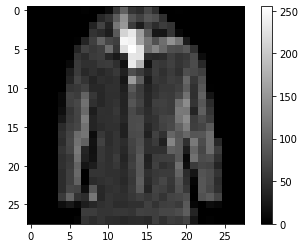

In [14]:
plt.figure()
plt.imshow(train_images[19], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images = train_images/255.0
test_images = test_images/255.0

In [16]:
model = keras.Sequential([
  Flatten(input_shape=(28,28)),
  Dense(128, activation='relu'),
  Dense(10)                 
])

In [17]:
#Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. 
#Adam combines the best properties of the AdaGrad and RMSProp algorithms 
#to provide an optimization algorithm that can handle sparse gradients on noisy problems.
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

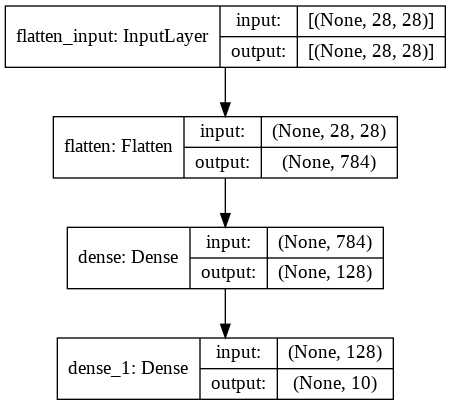

In [18]:
plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)
#SVG(model_to_dot(model).create(prog='dot',format='svg'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
h = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.6271 - accuracy: 0.7789
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3859 - accuracy: 0.8586
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3438 - accuracy: 0.8739
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3143 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2983 - accuracy: 0.8891
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2735 - accuracy: 0.8979
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2591 - accuracy: 0.9026
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2459 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

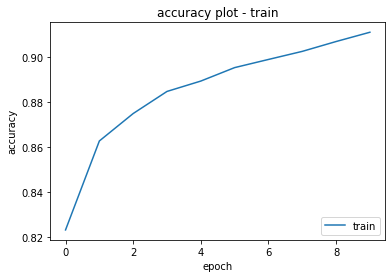

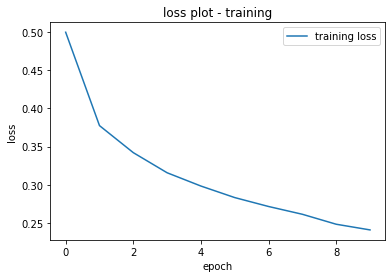

In [21]:
plt.plot(h.history['accuracy'])
plt.legend(['train'], loc='lower right')
plt.title('accuracy plot - train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(h.history['loss'])
plt.legend(['training loss'], loc = 'upper right')
plt.title('loss plot - training')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [22]:
KERAS_MODEL_NAME='tf_MODEL_FASHION_MNIST.h5'
model.save(KERAS_MODEL_NAME)

In [23]:
convert_bytes(get_file_size(KERAS_MODEL_NAME), "MB")

File Size: 1.19Megabytes


In [24]:
test_loss, test_acc = model.evaluate(test_images, test_lables, verbose=2)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

313/313 - 1s - loss: 0.3410 - accuracy: 0.8804
Test Accuracy: 0.8804000020027161
Test Loss: 0.3410314619541168


In [25]:
TF_LITE_MODEL_FILE_NAME = 'tf_lite_model.tflite'

# Converting Keras model to tflite

In [26]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp7itm9wu_/assets


In [27]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

408544

In [28]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

File Size: 398.969Kilobytes


In [29]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 28 28]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 10]
Output Type: <class 'numpy.float32'>


In [30]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 28, 28))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [10000    28    28]
Input Type: <class 'numpy.float32'>
Output Shape: [10000    10]
Output Type: <class 'numpy.float32'>


In [31]:
test_images.dtype

dtype('float64')

In [32]:
test_imgs_numpy = np.array(test_images, dtype=np.float32)

In [33]:
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()

tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])

print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction results shape: (10000, 10)


In [34]:
acc = accuracy_score(prediction_classes, test_lables)

In [35]:
print('Test accuracy TFLITE model :', acc)

Test accuracy TFLITE model : 0.8804


# Post training quantization of TF Lite Model

In [36]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_quant_model.tflite"

In [37]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE] #Optimise for Space
# tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tf_lite_converter.target_spec.supported_types = [tf.float16] #Quantised to float16
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp45bg2frd/assets


INFO:tensorflow:Assets written to: /tmp/tmp45bg2frd/assets


In [38]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

103856

In [39]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

File Size: 101.422Kilobytes


In [40]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 28 28]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 10]
Output Type: <class 'numpy.float32'>


In [41]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 28, 28))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [10000    28    28]
Input Type: <class 'numpy.float32'>
Output Shape: [10000    10]
Output Type: <class 'numpy.float32'>


In [42]:
test_images.dtype

dtype('float64')

In [43]:
test_imgs_numpy = np.array(test_images, dtype=np.float32)

In [44]:
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction results shape: (10000, 10)


In [45]:
acc = accuracy_score(prediction_classes, test_lables)

In [46]:
print('Test accuracy TFLITE model :', acc)

Test accuracy TFLITE model : 0.8811
